<a href="https://colab.research.google.com/github/rahiakela/edureka-deep-learning-with-tensorflow/blob/module-2-understanding-neural-networks-with-tensorflow/module_2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 2 Assignment

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [0]:
! pip install tensorflow

In [0]:
# Task 1: Run a hello world command
greeting = tf.constant('Hello World!!')
sess= tf.Session()
sess.run(greeting)

b'Hello World!!'

In [2]:
# Task 2: Train a linear regression model

# Reading the dataset
df = pd.read_csv('50_Startups.csv')
print(df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [3]:
# check length of dataset
print(len(df))

50


In [4]:
# check the shape
print(df.shape)

(50, 5)


In [5]:
# divide dataset into feature and target set
df_features = df.iloc[:, :-1]  # all columns except the last one
df_features.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [6]:
df_target = df.iloc[:, -1]  # only the last column
df_target.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [7]:
# check null value
df_features.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
dtype: int64

In [8]:
df_target.isnull().sum()

0

In [9]:
# taking care of categorical column
df_features['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

# convert categorical column into one-hot encoding
labelencoder_0 = LabelEncoder()
state_encoded = labelencoder_0.fit_transform(df_features['State'])
state_encoded[:5]

array([2, 0, 1, 2, 1])

In [11]:
len(state_encoded)

50

In [12]:
df_features.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')

In [13]:
# filter out dataset
encoded_features = df_features[['Administration', 'R&D Spend', 'Marketing Spend']]
encoded_features.head()

,Administration,R&D Spend,Marketing Spend
0,136897.80,165349.20,471784.10
1,151377.59,162597.70,443898.53
2,101145.55,153441.51,407934.54
3,118671.85,144372.41,383199.62
4,91391.77,142107.34,366168.42


In [14]:
# append encoded column to dataset
encoded_features['State'] = state_encoded
encoded_features.head()

,Administration,R&D Spend,Marketing Spend,State
0,136897.80,165349.20,471784.10,2
1,151377.59,162597.70,443898.53,0
2,101145.55,153441.51,407934.54,1
3,118671.85,144372.41,383199.62,2
4,91391.77,142107.34,366168.42,1


In [16]:
# normize the feature column
def feature_normalize(dataset):
  mu = np.mean(dataset,axis=0)
  sigma = np.std(dataset,axis=0)
  return (dataset - mu)/sigma
encoded_features = feature_normalize(encoded_features)
encoded_features.head()

,Administration,R&D Spend,Marketing Spend,State
0,0.560753,2.016411,2.153943,1.212678
1,1.082807,1.955860,1.923600,-1.212678
2,-0.728257,1.754364,1.626528,0.000000
3,-0.096365,1.554784,1.422210,1.212678
4,-1.079919,1.504937,1.281528,0.000000


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# prepare training and test set

# shuffle the dataset to mix up the rows.
X, Y = shuffle(encoded_features, df_target, random_state=1)
 
# convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)
 
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(40, 4)
(40,)
(10, 4)
(10,)


In [56]:
def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l

# convert feature, labels to numpy array
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')

f, l = append_bias_reshape(train_x, train_y)
n_dim = f.shape[1]
print(f'train_x shape: {f.shape}')
print(f'train_y shape: {l.shape}')
print(f'n_dim shape: {n_dim}')

train_x shape: (40, 4)
train_y shape: (40,)
train_x shape: (40, 4)
train_y shape: (40,)
train_x shape: (40, 5)
train_y shape: (40, 1)
n_dim shape: 5


In [57]:
rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

# hyper-parameters
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)
n_dim = train_x.shape[1]

# create placeholder for feature, label and weight
X = tf.placeholder(tf.float32,[None, n_dim])
Y = tf.placeholder(tf.float32,[None, 1])
W = tf.Variable(tf.ones([n_dim, 1]))
print(f'X shape: {X.shape}')
print(f'Y shape: {Y.shape}')
print(f'W shape: {W.shape}')

# initilize all variables
init = tf.global_variables_initializer()

# define linear regression equation
y_hat = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(y_hat - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# create sesstion
sess = tf.Session()
sess.run(init)

X shape: (?, 5)
Y shape: (?, 1)
W shape: (5, 1)


In [58]:
# run trainning 
for epoch in range(training_epochs):
  sess.run(training_step, feed_dict={X: train_x, Y: train_y})
  cost_history = np.append(cost_history, sess.run(cost, feed_dict={X: train_x, Y: train_y}))
  pred_y = sess.run(y_hat, feed_dict={X: test_x})
  mse = tf.reduce_mean(tf.square(pred_y - test_y))
  print(f'MSE: {str(sess.run(mse))}')

MSE: 12096157061.705353
MSE: 11632345116.546328
MSE: 11186946507.333866
MSE: 10759216398.05198
MSE: 10348440384.10257
MSE: 9953933811.389887
MSE: 9575040305.612133
MSE: 9211130617.862524
MSE: 8861601017.270746
MSE: 8525873226.078137
MSE: 8203392099.594235
MSE: 7893625846.603689
MSE: 7596064333.757228
MSE: 7310217687.119812
MSE: 7035617284.17984
MSE: 6771812573.868602
MSE: 6518372198.917826
MSE: 6274881419.409895
MSE: 6040943897.53903
MSE: 5816177810.837172
MSE: 5600217554.879231
MSE: 5392713361.687479
MSE: 5193327728.313975
MSE: 5001737991.951513
MSE: 4817634753.745923
MSE: 4640720913.046968
MSE: 4470710917.484312
MSE: 4307330999.084359
MSE: 4150319082.8731904
MSE: 3999422098.5750327
MSE: 3854399456.8898163
MSE: 3715017821.0016546
MSE: 3581055434.6164794
MSE: 3452297837.953641
MSE: 3328539509.4326224
MSE: 3209584363.370929
MSE: 3095242989.0313
MSE: 2985333038.824873
MSE: 2879680468.4392385
MSE: 2778118382.579849
MSE: 2680485805.5444546
MSE: 2586629015.5763965
MSE: 2496399218.3015127
MS

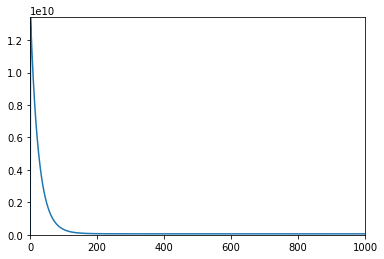

MSE: 181642951.5155


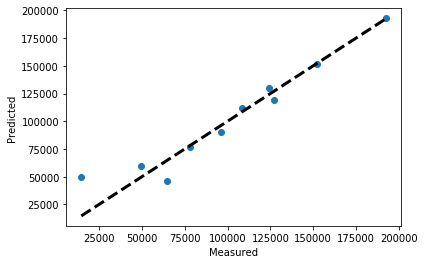

In [61]:
import matplotlib.pyplot as plt

plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs, 0, np.max(cost_history)])
plt.show()

pred_y = sess.run(y_hat, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()